In [1]:
#导入所需要的库
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv(r"C:\Users\27016\Desktop\kaggle房价预测\house-prices-advanced-regression-techniques/train.csv")
test =  pd.read_csv(r"C:\Users\27016\Desktop\kaggle房价预测\house-prices-advanced-regression-techniques/test.csv")
train.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


<AxesSubplot:>

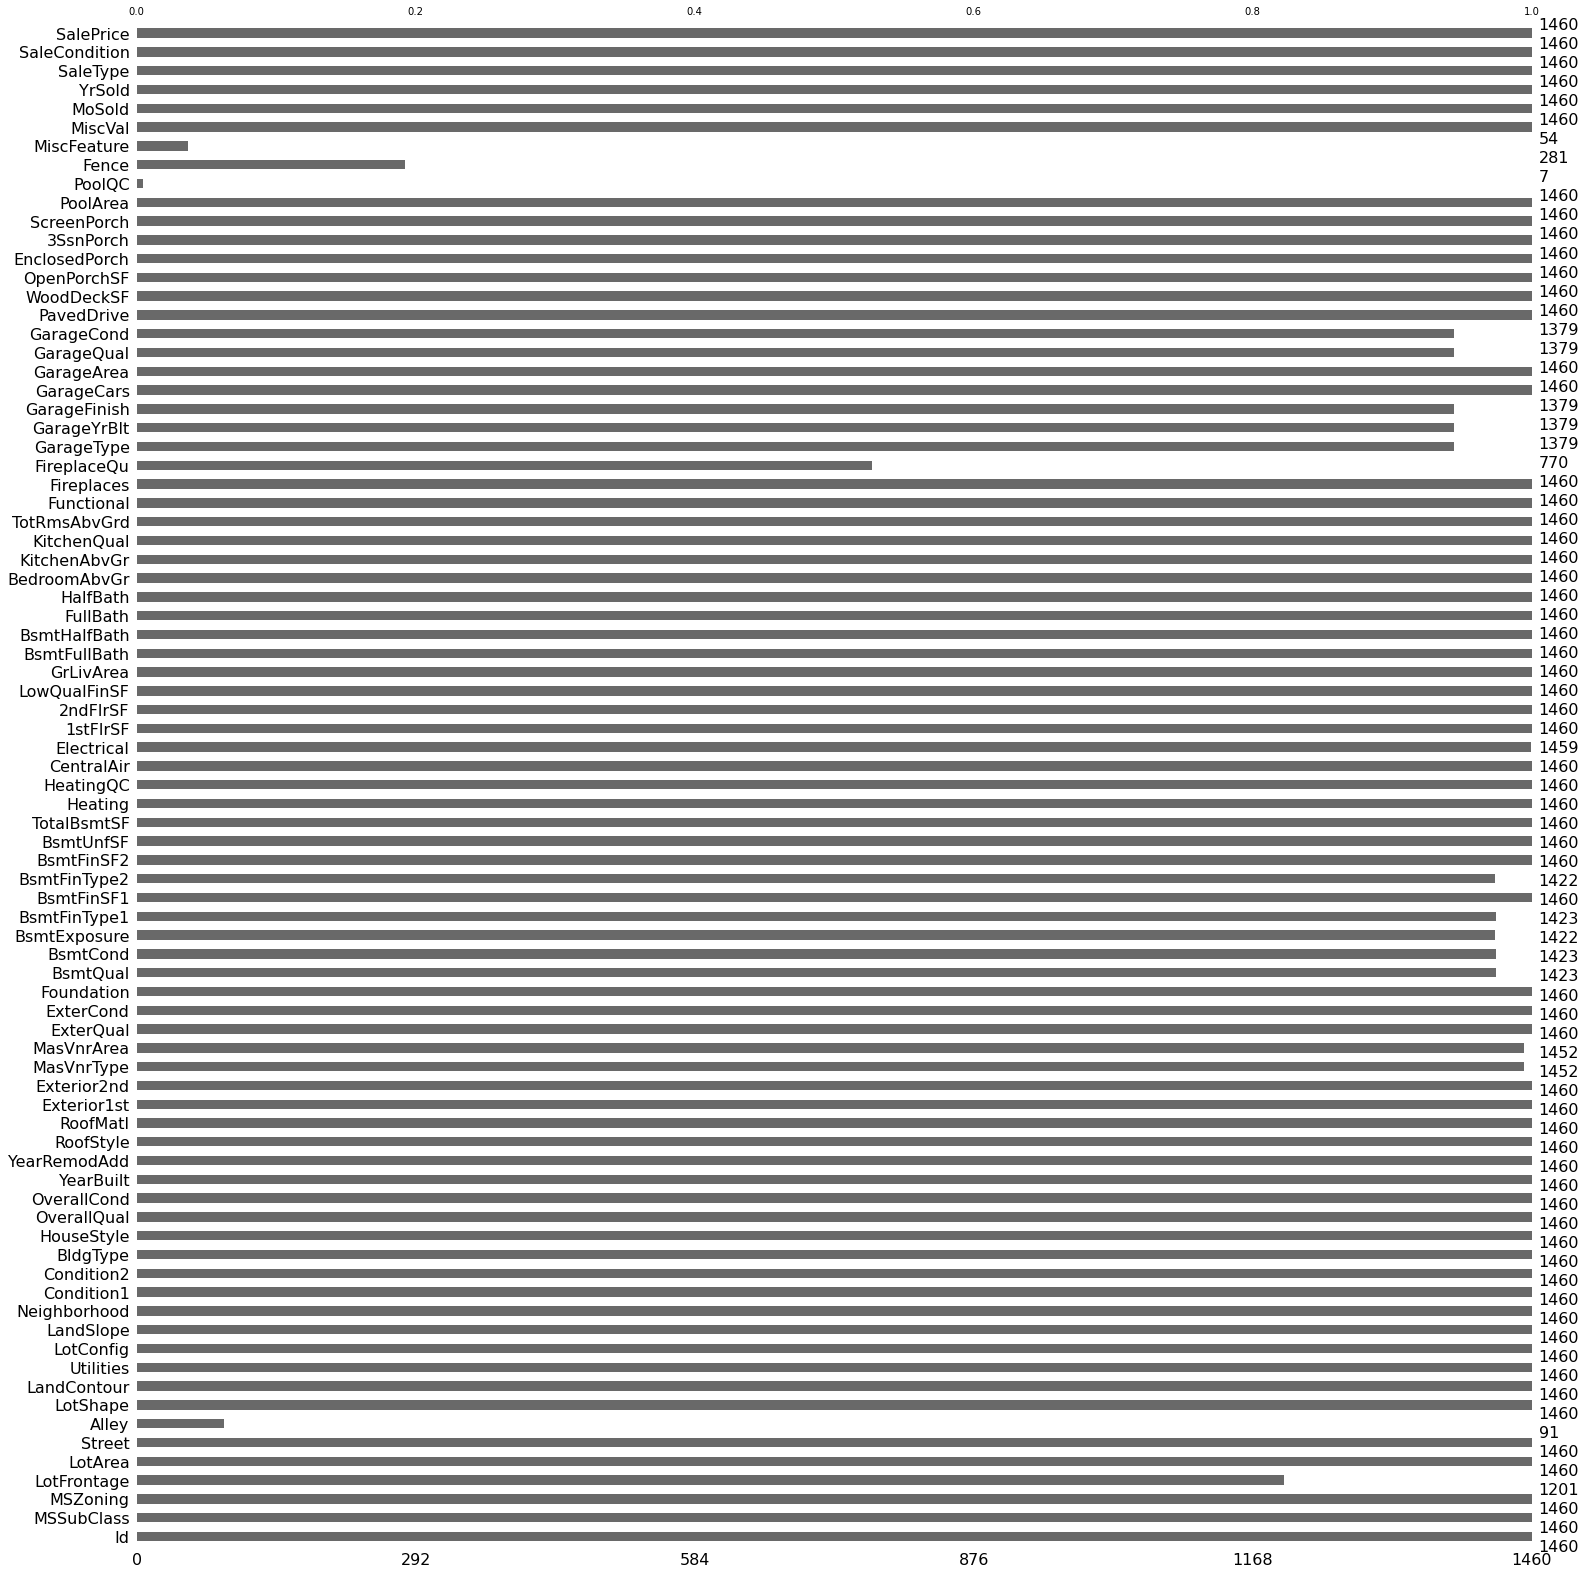

In [2]:
#条形图显示训练集缺失数据的情况
train = pd.read_csv(r"C:\Users\27016\Desktop\机器学习\house-prices-advanced-regression-techniques/train.csv")
msno.bar(train)

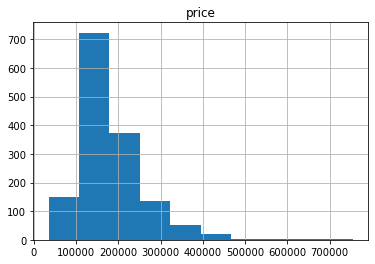

In [30]:
#查看一下价格主要分布在哪，观察价格的价格主要集中在200000的附近
prices = pd.DataFrame({'price': train['SalePrice']})
prices.hist()  # 画图 
plt.show()

In [4]:
#合并数据集，方便进行统一的处理
y_train=train['SalePrice'].copy()
data=pd.concat((train,test)).reset_index(drop=True)
data=data.drop('SalePrice',1)
data=data.drop('Id',axis=1)

C:\Users\27016\AppData\Local\Temp/ipykernel_24164/618958861.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop('SalePrice',1)


In [5]:
#看合并之后的数据集缺失值的大致数量
miss_data=data.isnull().sum().sort_values(ascending=False)
miss_data

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
SaleCondition       0
Length: 79, dtype: int64

In [6]:
#查看具体每一列的类型，方便下面进行对应的填充
data.shape
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
#对缺失值进行填充，根据上面输出的不同类型来进行不同的数据填充
#对非数值列采用空值填充
data['PoolQC']=data['PoolQC'].fillna('NA')
data['MiscFeature']=data['MiscFeature'].fillna('NA')
data['Alley']=data['Alley'].fillna('NA')
data['Fence']=data['Fence'].fillna('NA')
data['FireplaceQu']=data['FireplaceQu'].fillna('NA')
data['GarageCond']=data['GarageCond'].fillna('NA')
data['GarageQual']=data['GarageQual'].fillna('NA')
data['GarageFinish']=data['GarageFinish'].fillna('NA')
data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
data['BsmtCond']=data['BsmtCond'].fillna('NA')
data['BsmtQual']=data['BsmtQual'].fillna('NA')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
data['Exterior2nd']=data['Exterior2nd'].fillna('NA')
data['Exterior1st']=data['Exterior1st'].fillna('NA')
data['MasVnrType']=data['MasVnrType'].fillna('NA')
data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)
data['GarageType']=data['GarageType'].fillna(0)
data['GarageArea']=data['GarageArea'].fillna(0)
data['GarageCars']=data['GarageCars'].fillna(0)
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
#对数值列进行平均值的填充
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].dropna().mean())
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].dropna().sort_values().index[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].dropna().sort_values().index[0])
data['Functional']=data['Functional'].fillna(data['Functional'].dropna().sort_values().index[0])
data['SaleType']=data['SaleType'].fillna(data['SaleType'].dropna().sort_values().index[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].dropna().sort_values().index[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].dropna().sort_values().index[0])

<AxesSubplot:>

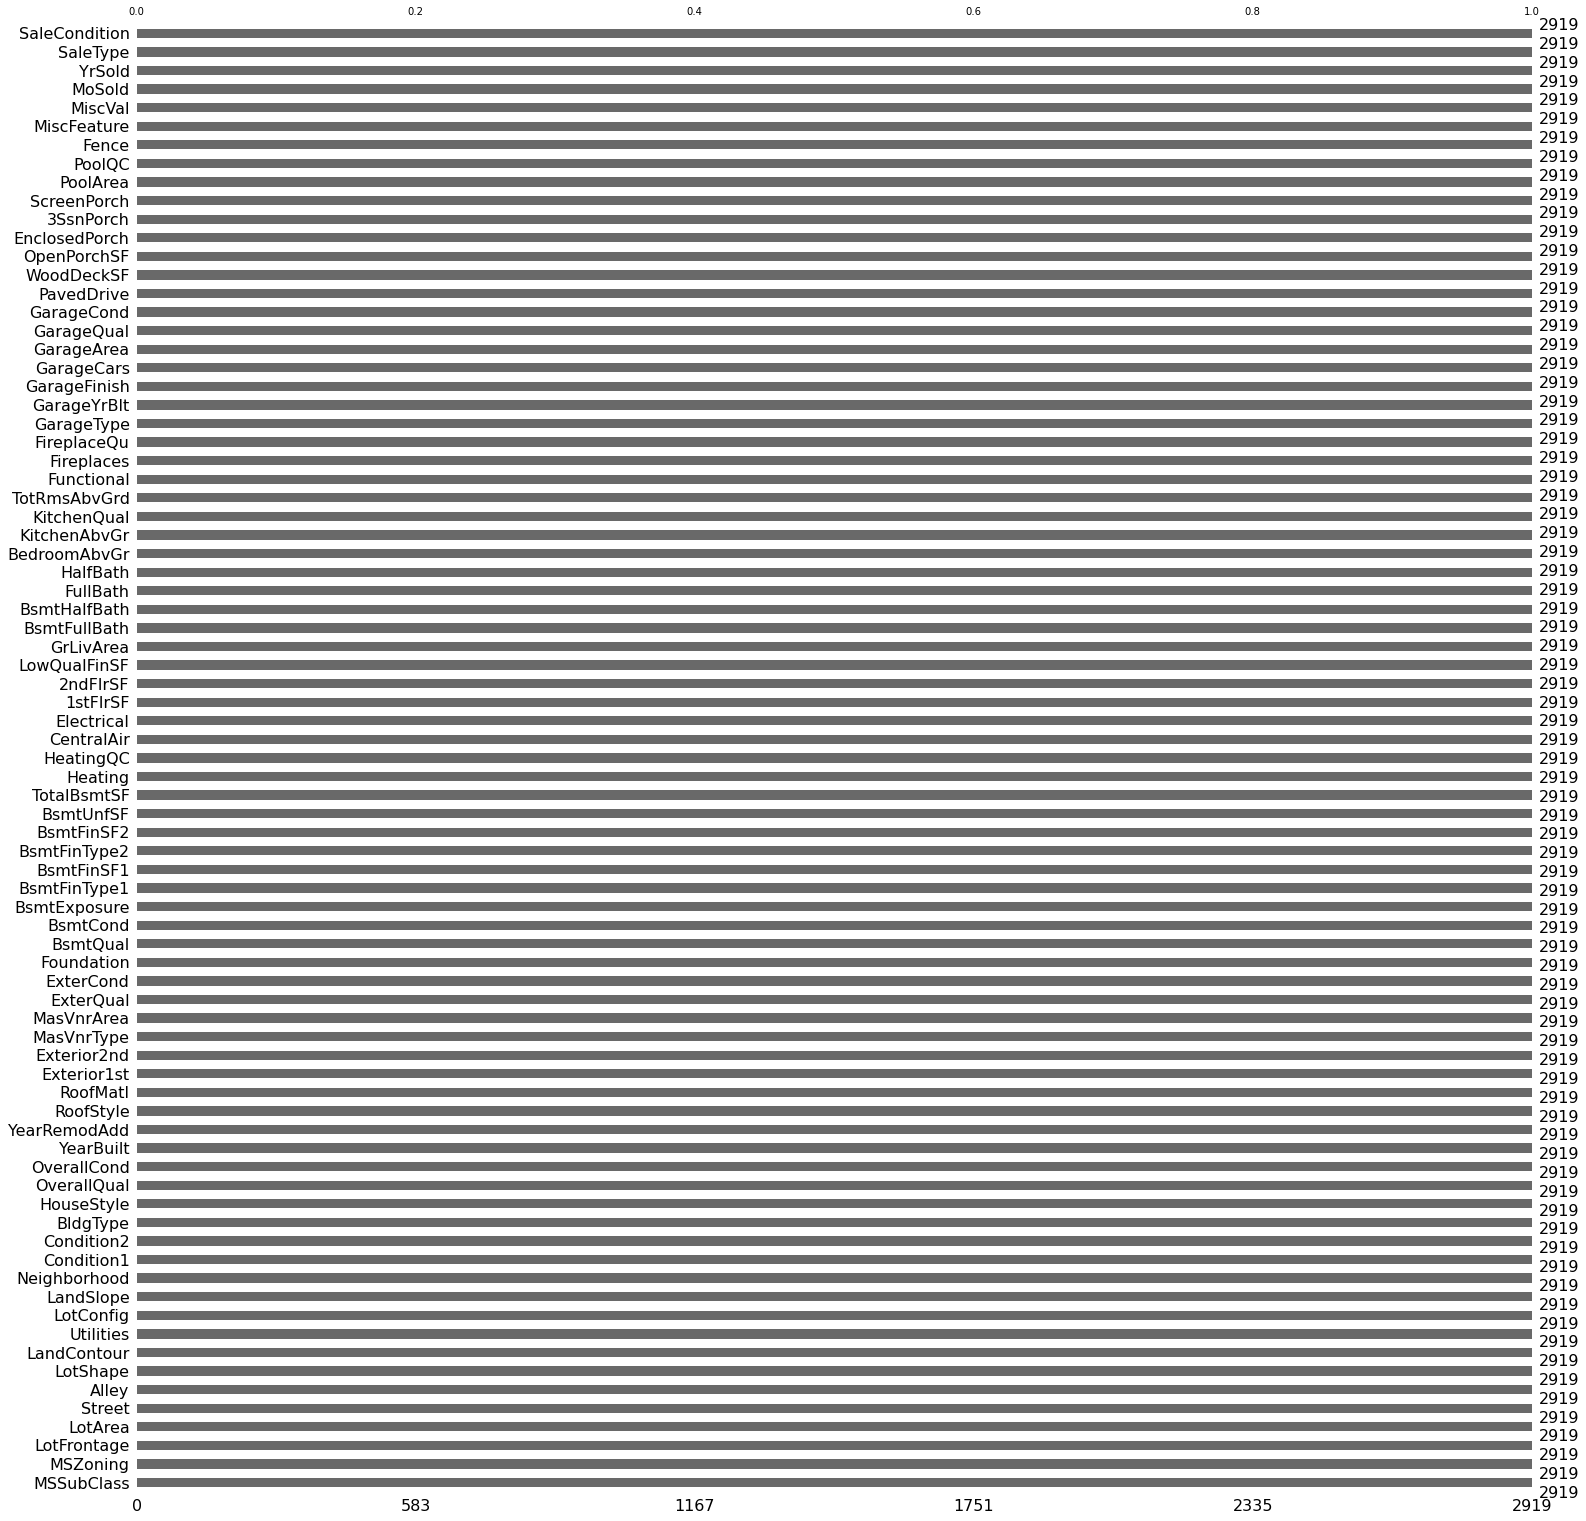

In [8]:
#对填充的数据进行查看，看是否有没有填充的数据
msno.bar(data)

In [14]:
#使用pd.get_dummies()将建筑类，一般分区类，总体材料和加工质量等转化成哑变量方便我们的模型进行学习
#将哑变量引入回归模型，虽然使模型变得较为复杂，但可以更直观地反映出该自变量的不同属性对于因变量的影响，提高了模型的精度和准确度。
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [27]:
#对训练集和测试集进行分离
from sklearn.preprocessing import StandardScaler
train_df = data.loc[train.index]
test_df = data.loc[test.index]
#使用StandardScaler对我们的数据进行标准化处理，可以提高模型的准确率
scaler=StandardScaler()
scaler=scaler.fit(train_df)
train_df_scaled=scaler.transform(train_df)
test_df_scaled=scaler.transform(test_df)

In [22]:
#选用的模型是xgboost模型,处理回归及分类问题是一种结合树模型的结构特点，使用函数空间的梯度下降，实现优化损失函数的集成模型
from xgboost import XGBRegressor
#n_estimators最大的弱学习器个数，默认值为100，太大会过拟合，太小又会过拟合，因此采用不大不小1000
#fit(x,y) :传入数据train_df_scaled，y_train以及标签即可训练模型
reg =XGBRegressor(n_estimators=1000,eta=0.05).fit(train_df_scaled,y_train)
#score(x,y)用于对模型的正确率进行评分(范围0-1)
print(reg.score(train_df_scaled,y_train))
#predict(x)用于对数据的预测，它接受输入，并输出预测标签，输出的格式为numpy数组,通常使用这个方法返回测试的结果，再将这个结果用于评估模型
pres = reg.predict(test_df_scaled)
test['SalePrice']=pres
#根据题目要求，定义预测输出的格式，两列分别为Id，SalePrice
col_n = ['Id','SalePrice'] 
a = pd.DataFrame(test,columns = col_n)
a.to_csv(r'C:\Users\27016\Desktop\kaggle房价预测\HousePricePredit.csv',index=False)

0.9996912883780426
